In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np

In [98]:
# Load dataset
data = pd.read_csv('tips (data for regression problem).csv')
data


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [58]:
print(data.dtypes)

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [59]:
# Check for duplicates in the dataset
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop the duplicate rows in the dataset
data = data.drop_duplicates()

Number of duplicate rows: 1


In [133]:
data_dummies = pd.get_dummies(data, drop_first=True)

data_dummies.replace([np.inf, -np.inf], np.nan, inplace=True)
data_dummies.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [65]:
# Step 1: Split the data into features (X) and target variable (y)
X = data_dummies.drop("tip", axis = 1)
y = data_dummies["tip"]


## Step 2: Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52) # seed in random generation


#### Train a Linear Regression model

In [66]:
# Step 3:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Step 4: Predictions
y_pred_linear = linear_reg.predict(X_test)

# Step 5: Evaluate the model (R-squared)
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))


Linear Regression R2: 0.41521647854764576


### Ridge Regression

In [67]:
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression R2: 0.4192349184431672


### Lasso Regression

In [68]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))


Lasso Regression R2: 0.4273315911036826


### Decision Tree Regression

In [96]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))

Decision Tree R2: 0.10925660439431906


### Ensemble Method (Random Forest Regression)

In [70]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))


Random Forest R2: 0.38529398928199776


### Support Vector Regression (SVR)

In [71]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()  # Scale for features
sc_y = StandardScaler()  # Scale for target

# Scaling the features
X_train_scaled = sc_X.fit_transform(X_train)  # Scale X_train
X_test_scaled = sc_X.transform(X_test)   
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


svr_reg = SVR(kernel='rbf') 
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_svr = svr_reg.predict(X_test_scaled)

# Inverse transform the predicted values to the original scale
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Reshape for inverse transformation

# Evaluate the performance using R^2 score
print('SVR R2:', r2_score(y_test, y_pred_svr))

SVR R2: 0.5285106537175468


### K-Nearest Neighbors (KNN) Regression

In [72]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.37579996102099833


### Feature Importance Analysis


Linear Regression Coefficients:
smoker_Yes   -0.184367
day_Thur     -0.133948
day_Sat      -0.110756
sex_Male     -0.011756
day_Sun       0.049611
total_bill    0.100405
size          0.131493
time_Lunch    0.219251
dtype: float64


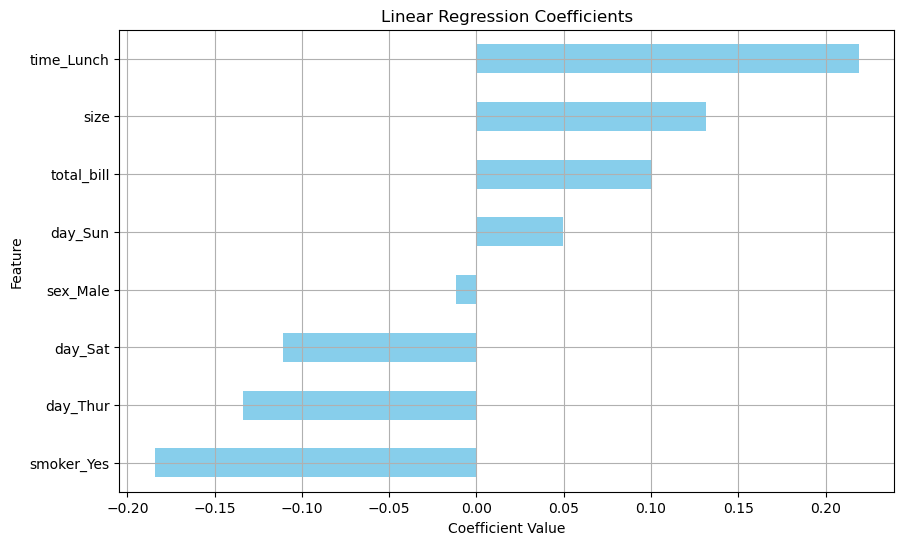

In [83]:
# 1. Linear Regression Coefficients
coefficients = pd.Series(linear_reg.coef_, index=X.columns)
coefficients = coefficients.sort_values()

print("\nLinear Regression Coefficients:")
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='skyblue')
plt.title("Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


 ridge Regression Coefficients:
smoker_Yes   -0.159220
day_Sat      -0.110542
day_Thur     -0.029652
sex_Male     -0.010889
day_Sun       0.045448
total_bill    0.099974
time_Lunch    0.111687
size          0.129697
dtype: float64


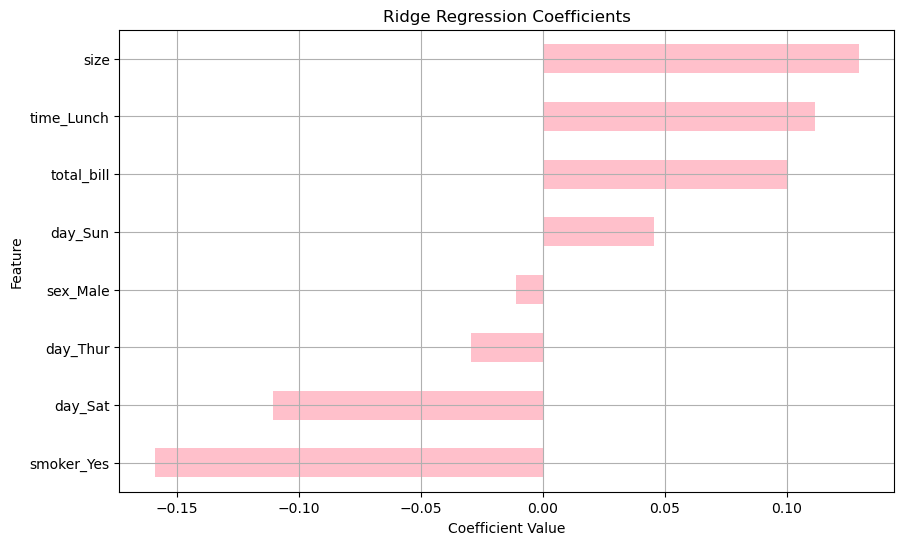

In [86]:
# Feature Importance Analysis
# 1.Ridge Regression Coefficients
coefficients = pd.Series(ridge_reg.coef_, index=X.columns)
coefficients = coefficients.sort_values()

print("\n ridge Regression Coefficients:")
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='pink')
plt.title("Ridge Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


 Lasso Regression Coefficients:
smoker_Yes   -0.138530
day_Sat      -0.134849
sex_Male     -0.000000
day_Sun       0.000000
day_Thur      0.000000
time_Lunch    0.018251
total_bill    0.099691
size          0.124487
dtype: float64


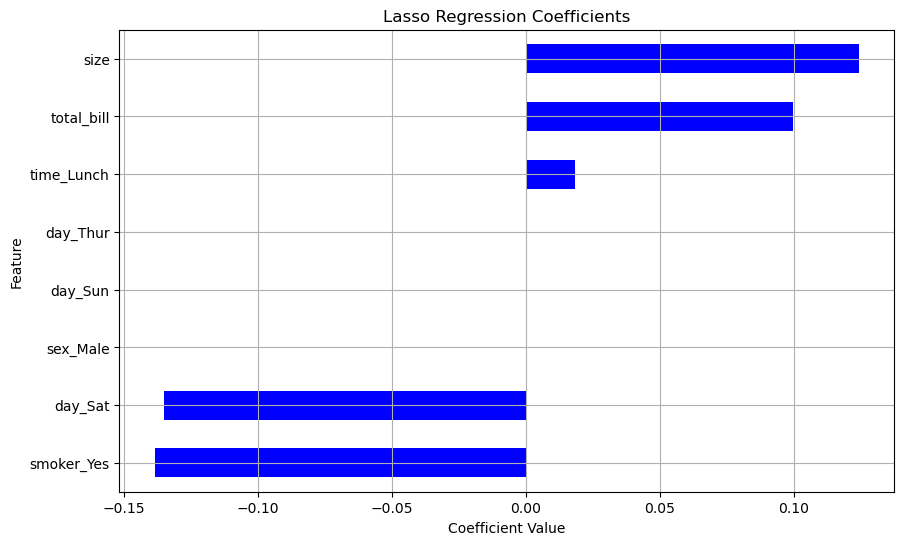

In [102]:
# Feature Importance Analysis
# 1.Lasso Regression Coefficients
coefficients = pd.Series(lasso_reg.coef_, index=X.columns)
coefficients = coefficients.sort_values()

print("\n Lasso Regression Coefficients:")
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='Blue')
plt.title("Lasso Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


Random Forest Feature Importances:
day_Sun       0.010922
day_Thur      0.014673
time_Lunch    0.016508
sex_Male      0.018711
size          0.019901
day_Sat       0.028713
smoker_Yes    0.055597
total_bill    0.834976
dtype: float64


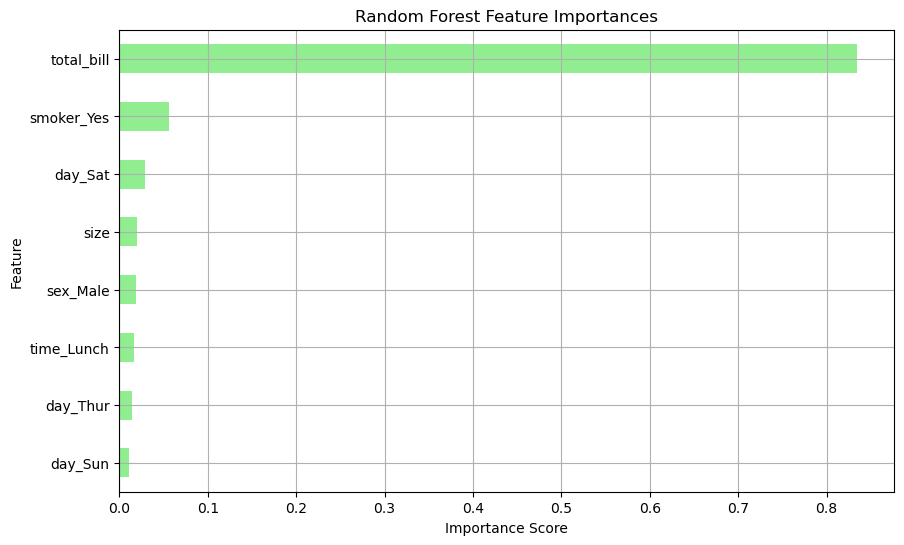

In [99]:
# Feature Importance Analysis
# 1.Decision Tree Regression Coefficients
feature_importances = pd.Series(tree_reg.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values()

print("\nRandom Forest Feature Importances:")
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='lightgreen')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.show()


Permutation Feature Importances:
day_Thur     -0.050679
time_Lunch   -0.008197
day_Sat       0.017686
size          0.036736
day_Sun       0.042670
sex_Male      0.049667
smoker_Yes    0.119361
total_bill    0.947176
dtype: float64


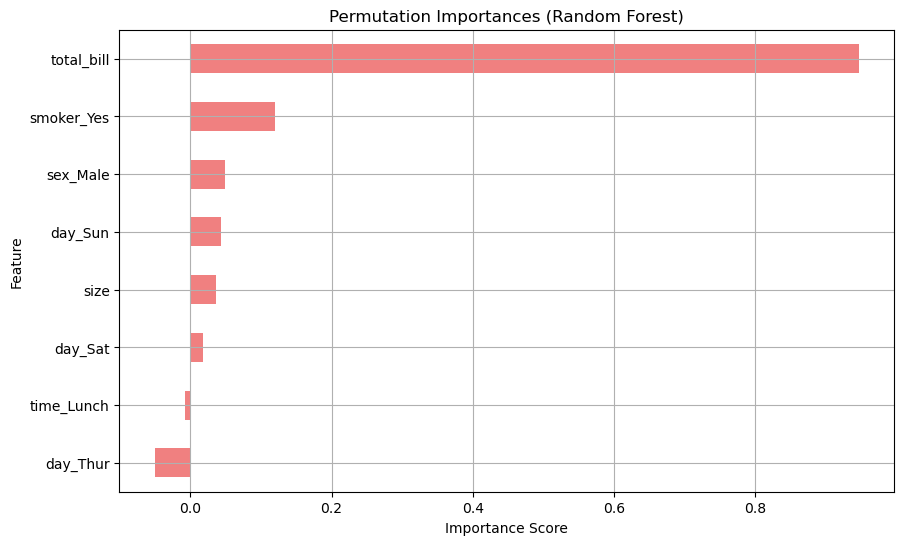

In [100]:
# 3. Permutation Importance (using Random Forest as an example)
perm_importance = permutation_importance(tree_reg, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.Series(perm_importance.importances_mean, index=X.columns)
perm_importance_df = perm_importance_df.sort_values()

print("\nPermutation Feature Importances:")
print(perm_importance_df)

# Plotting permutation importances
plt.figure(figsize=(10, 6))
perm_importance_df.plot(kind='barh', color='lightcoral')
plt.title("Permutation Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.show()

In [ ]:
### total bill significantly impact tip value

### plotting

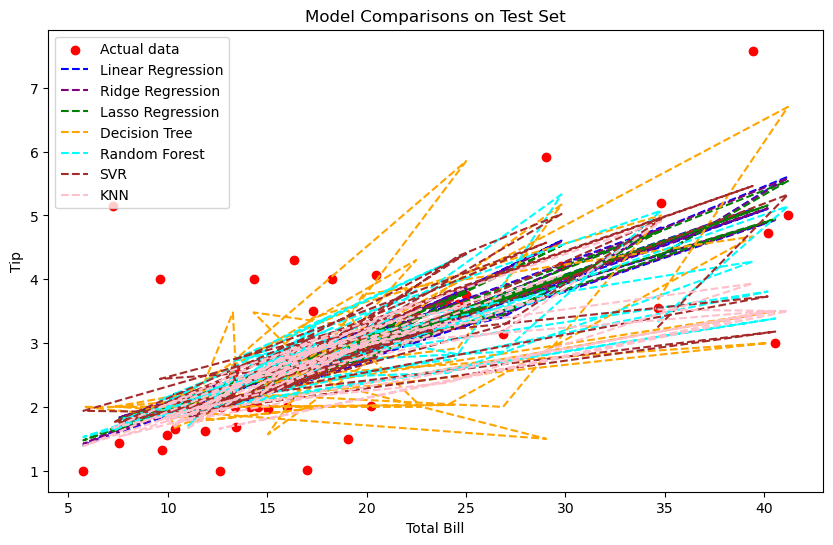

In [73]:
# Step 6: Visualize the Actual vs Predicted Tips (we'll use a specific feature like 'total_bill')
plt.figure(figsize=(10, 6))
plt.scatter(X_test['total_bill'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['total_bill'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['total_bill'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

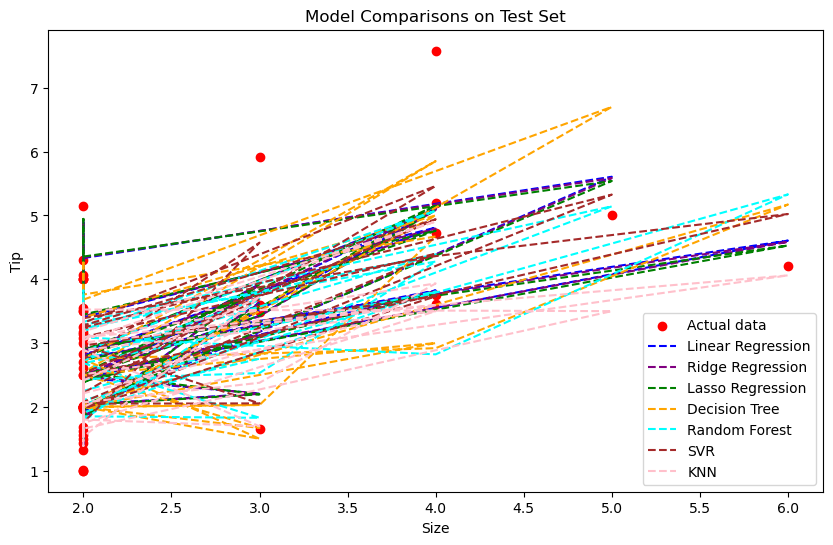

In [51]:
# Step 6: Visualize the Actual vs Predicted Tips (we'll use a specific feature like 'Size')
plt.figure(figsize=(10, 6))
plt.scatter(X_test['size'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['size'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['size'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['size'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['size'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['size'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['size'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['size'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Size')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

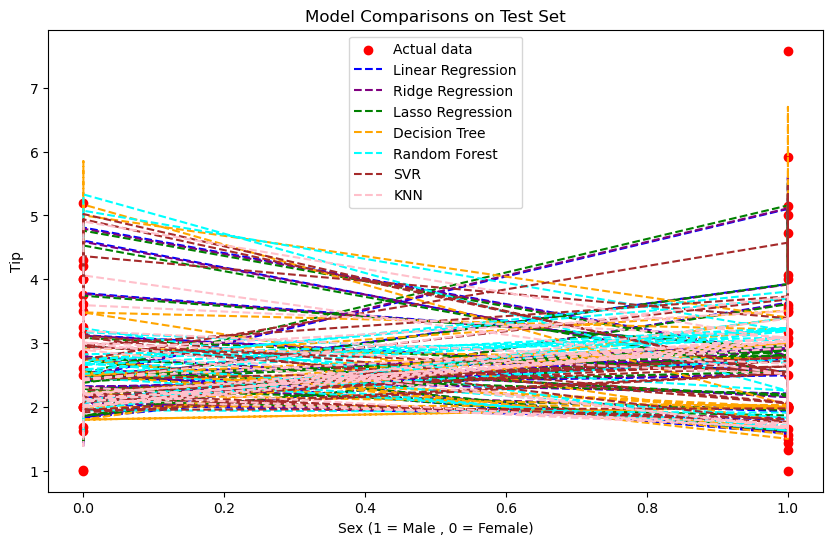

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['sex_Male'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['sex_Male'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['sex_Male'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Sex (1 = Male , 0 = Female)')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

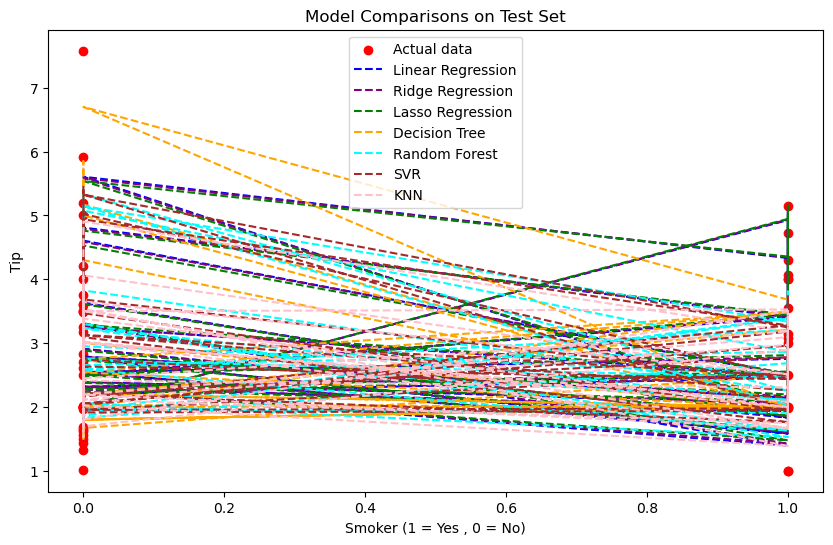

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['smoker_Yes'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['smoker_Yes'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['smoker_Yes'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Smoker (1 = Yes , 0 = No)')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

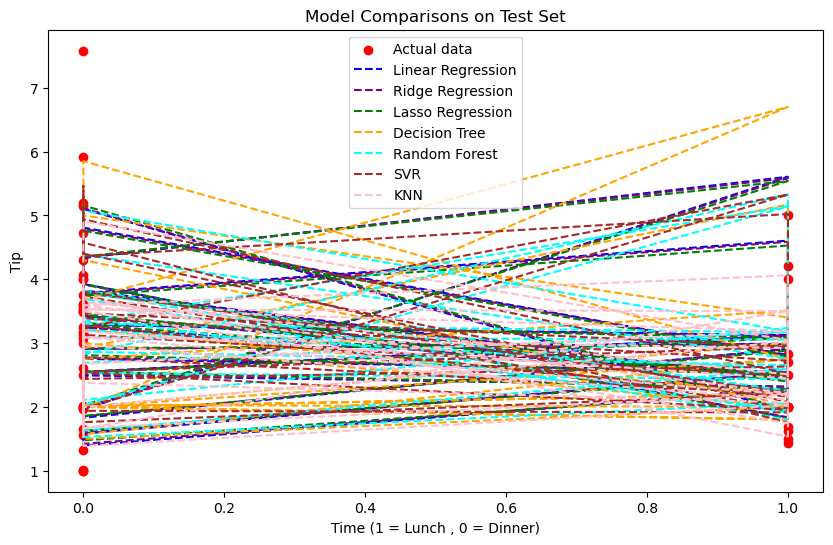

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['time_Lunch'], y_test, color='red', label='Actual data')  # Actual data (target vs. feature)

plt.plot(X_test['time_Lunch'], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_tree, color='orange', label='Decision Tree', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_forest, color='cyan', label='Random Forest', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test['time_Lunch'], y_pred_knn, color='pink', label='KNN', linestyle='--')


plt.xlabel('Time (1 = Lunch , 0 = Dinner)')
plt.ylabel('Tip')
plt.title('Model Comparisons on Test Set')
plt.legend()
plt.show()

In [ ]:
### 2. Check if the data follows a linear trend using following methods to analyze the
#       relationship between the target variable and predictors.

##  for Linear Regressor Model between Total_bill and tip value

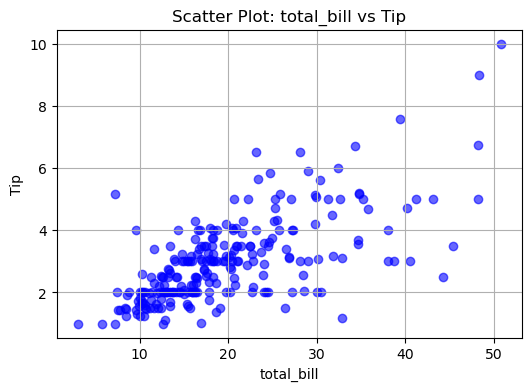

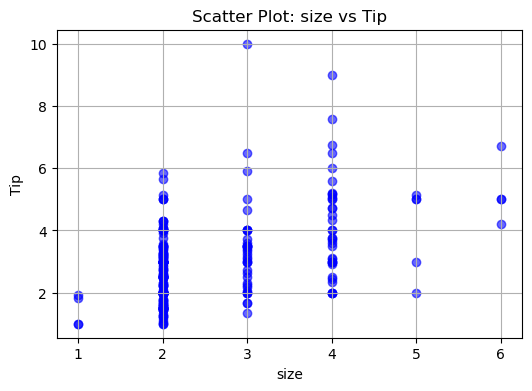

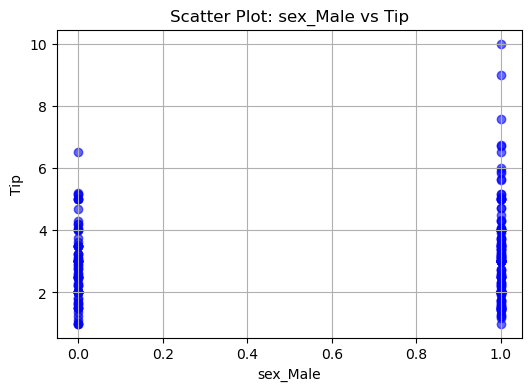

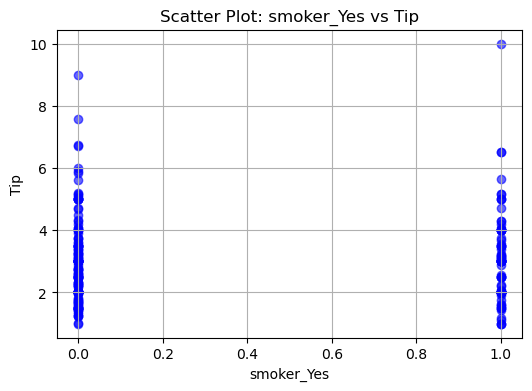

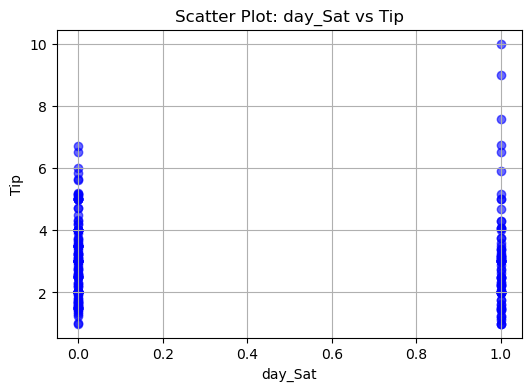

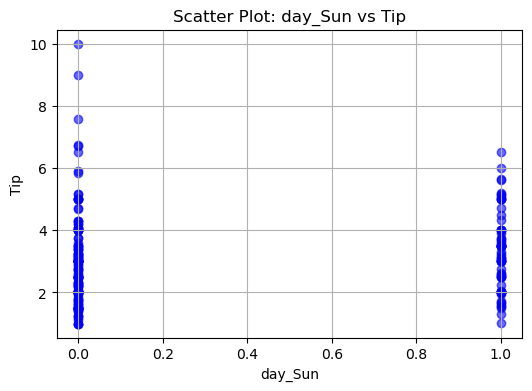

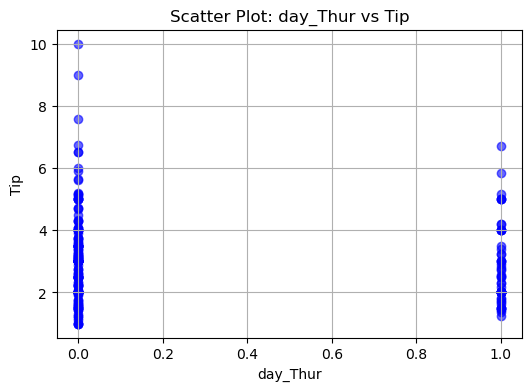

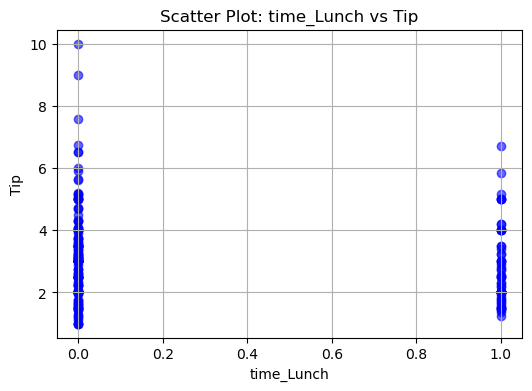

In [118]:
# Scatter plot for each feature vs target
for col in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[col], y, alpha=0.6, color='blue')
    plt.title(f'Scatter Plot: {col} vs Tip')
    plt.xlabel(col)
    plt.ylabel('Tip')
    plt.grid(True)
    plt.show()

C:\Users\91827\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91827\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91827\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91827\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(val

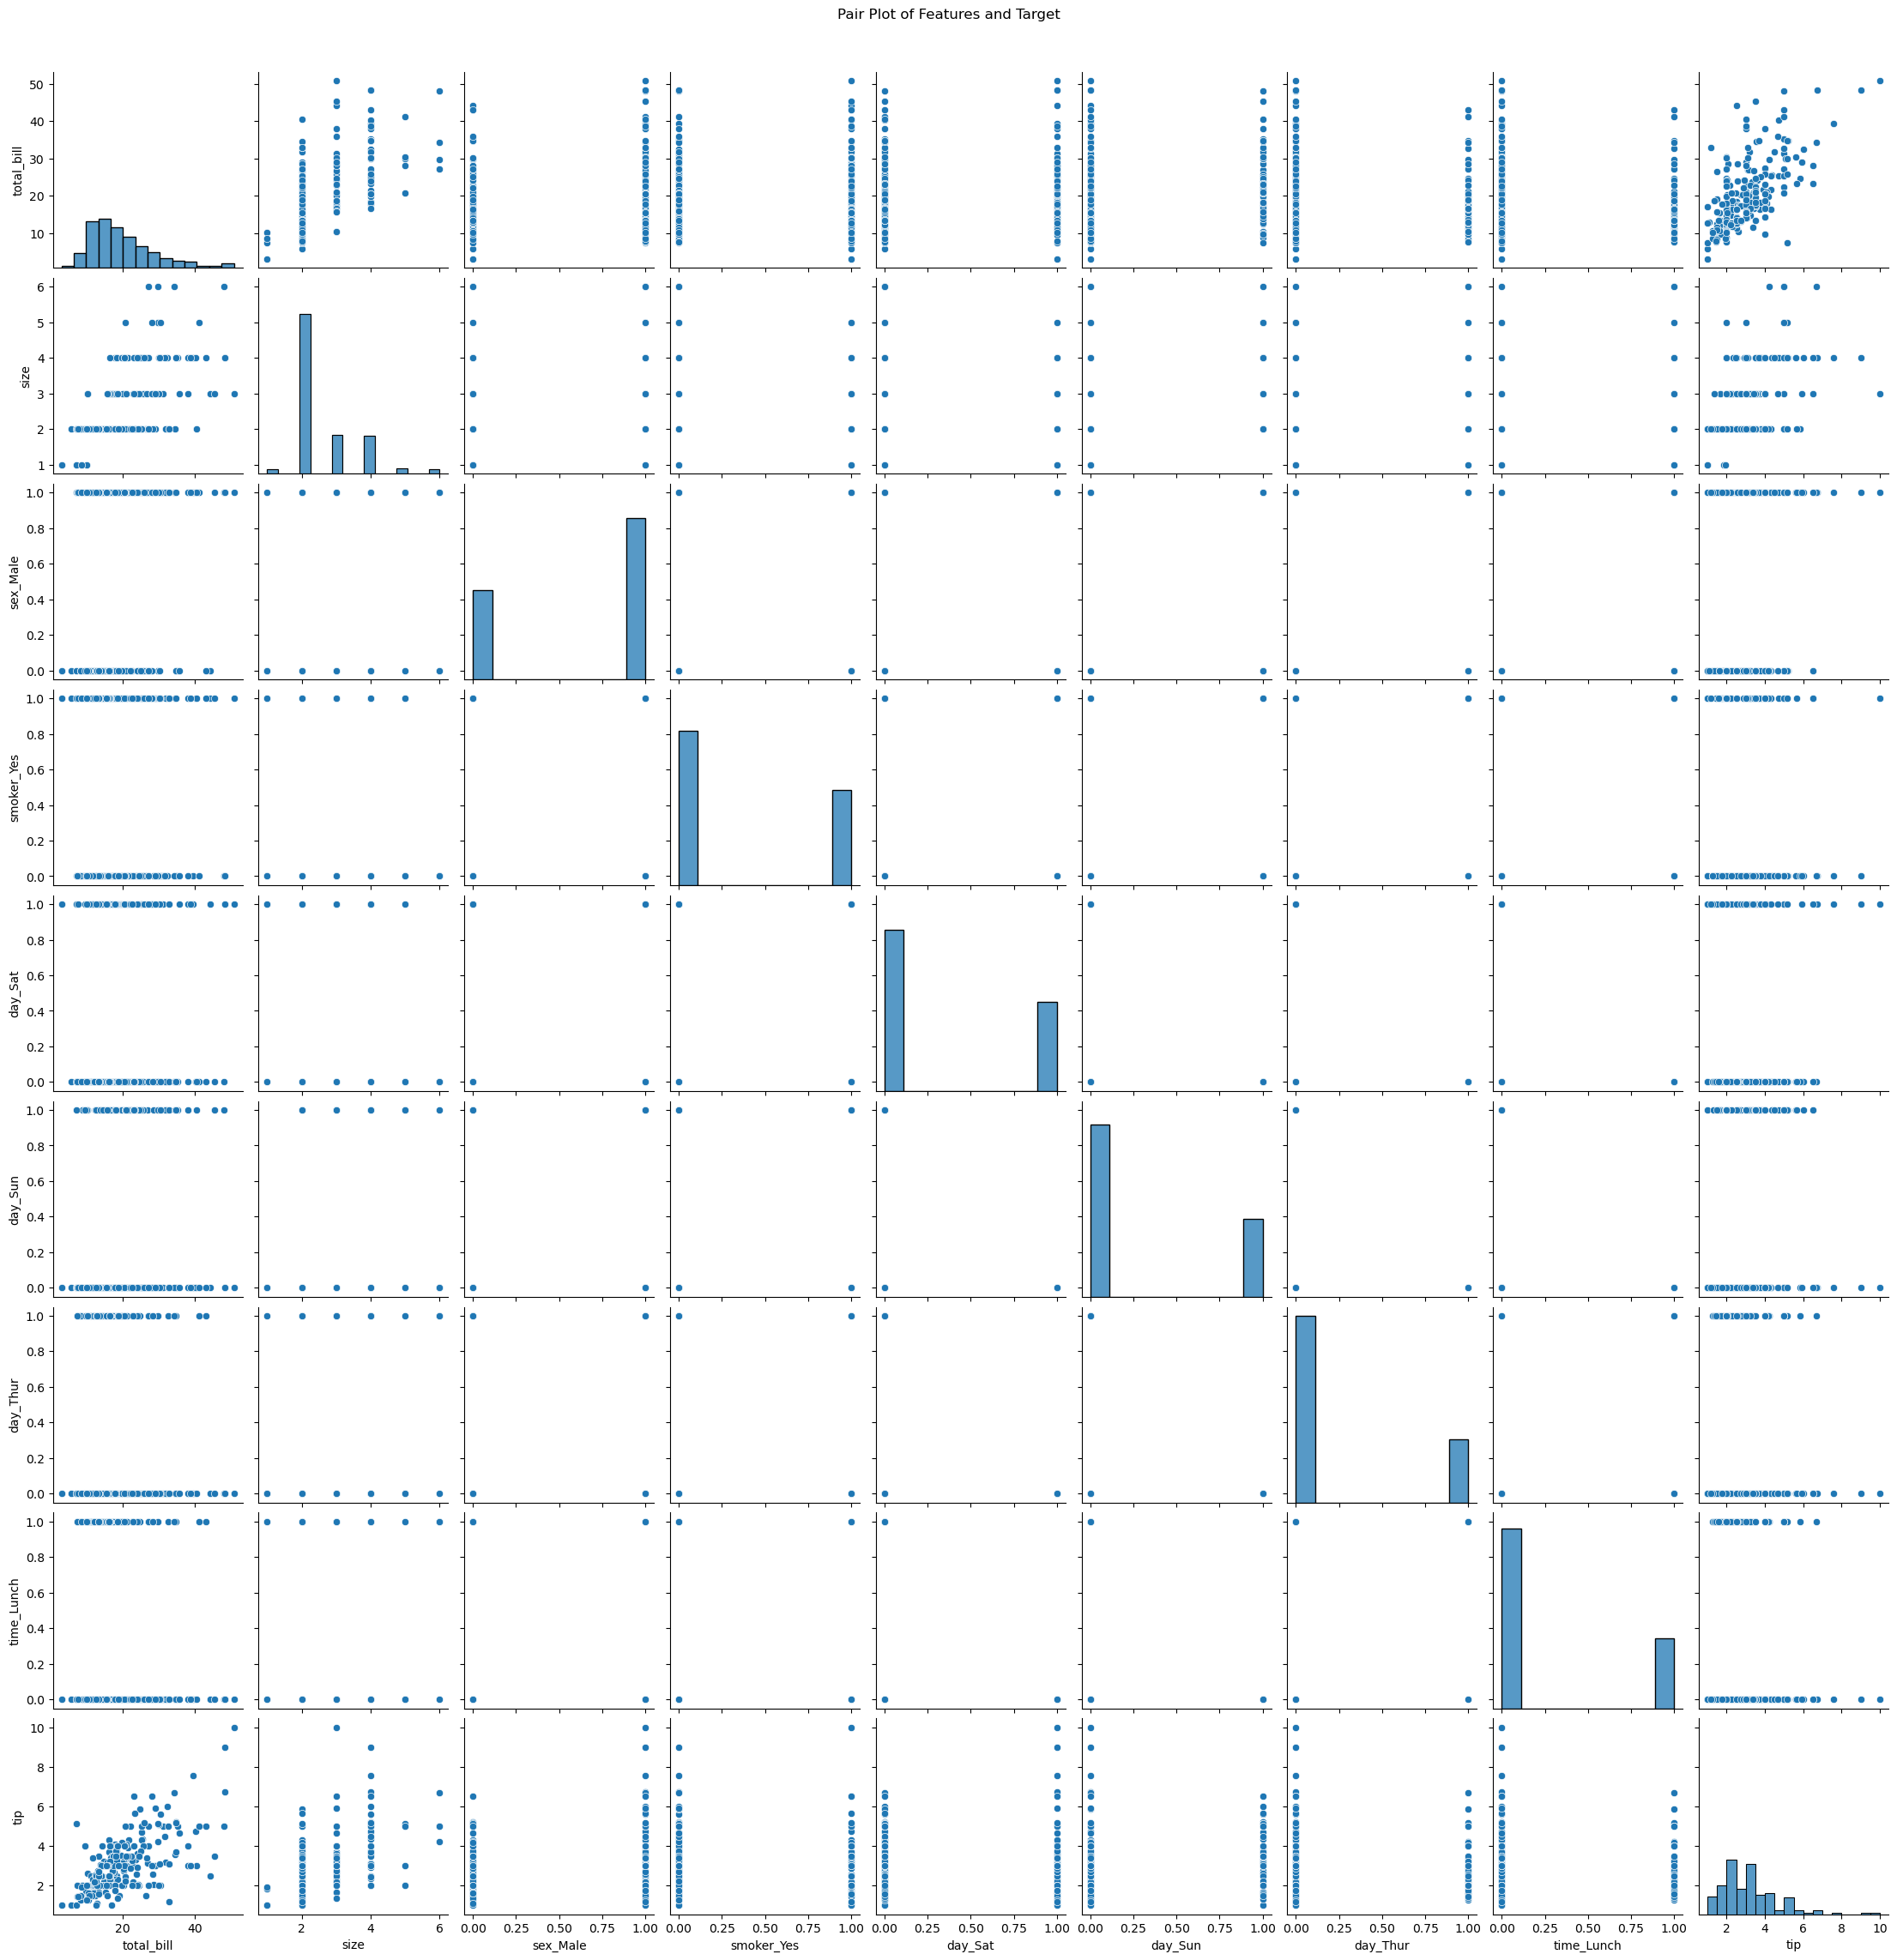

In [136]:
# Pair plot of features vs target variable
sns.pairplot(data_dummies, vars=X.columns.tolist() + ['tip'], kind='scatter', height=2.5)
plt.suptitle('Pair Plot of Features and Target', y=1.02)
plt.show()


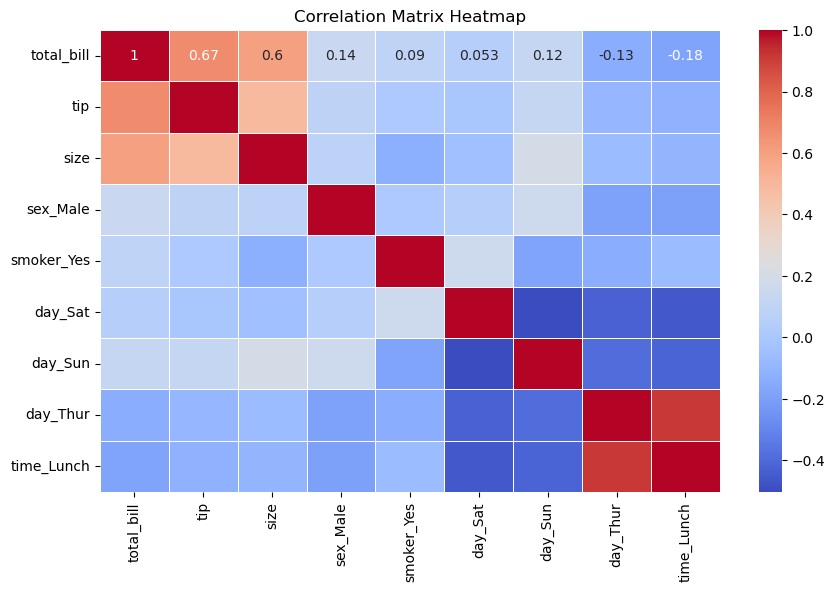

In [120]:
# Correlation matrix (heatmap)
corr_matrix = data_dummies.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## I have used one-hot enoding thats why values are not showing as they are Binary (True / false)


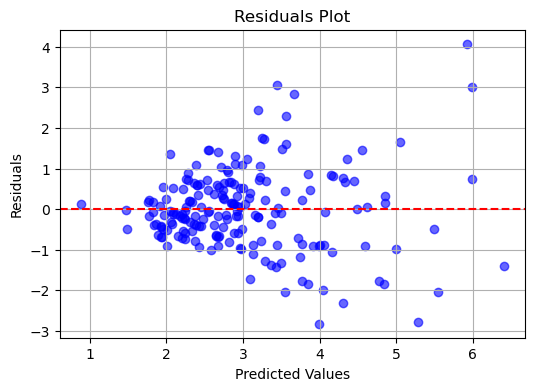

In [122]:
# Fit the Linear Regression model to the training data
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions on training data
y_train_pred = linear_reg.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals
plt.figure(figsize=(6, 4))
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
